In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from matplotlib import rc
import matplotlib.font_manager as fm

plt.rc('font', family='Malgun Gothic')
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False}, style='darkgrid')

In [3]:
bustime = pd.read_excel('C:/Users/admin/Desktop/WithU-HJ/data/운행계통.xlsx')
bustime.head()

,연번,노선번호,업체,기점,경유지,종점,상용대수\n(운행대수),Unnamed: 7,Unnamed: 8,예비대수,...,Unnamed: 12,배차간격,배차간격.1,배차간격.2,배차간격.3,운행횟수,운행횟수.1,운행횟수.2,운행횟수.3,첫차\n막차
0,NaN,NaN,NaN,NaN,NaN,NaN,평일,토요일,공휴일,NaN,...,휴식시간\n(분),평일\n첨두,평일\n비첨두,토요일\n첨두,공휴일\n첨두,평일\n1대당횟수,평일\n1일총횟수,토요일\n1일총횟수,공휴일\n1일총횟수,NaN
1,1,2,동원,다대포,하단,부산역,18,18,17,1.0,...,20,7,11,10,11,5.7,102,102,100,05:00\n22:15
2,2,3,동진,다대포,하단,신호주거\n단지,15,12,12,1.0,...,20,11,14,16,16,4.9,73,65,65,05:00\n21:50
3,3,5-1,삼성,회동동,서면,국제여객터미널,16,13,13,1.0,...,35,13,16,17,16,4.1,66,57,61,04:50\n22:20
4,4,6,남부,청학동,남포동,괴정,20,17,15,1.0,...,20,5,8,9,11,6.2,123,106,93,04:50\n22:45


In [4]:
bustime = bustime[['노선번호', '배차간격', '배차간격.1', '배차간격.2', '배차간격.3', '운행횟수', '운행횟수.1', '운행횟수.2', '운행횟수.3', '운행거리(km)']]
bustime.head()

,노선번호,배차간격,배차간격.1,배차간격.2,배차간격.3,운행횟수,운행횟수.1,운행횟수.2,운행횟수.3,운행거리(km)
0,NaN,평일\n첨두,평일\n비첨두,토요일\n첨두,공휴일\n첨두,평일\n1대당횟수,평일\n1일총횟수,토요일\n1일총횟수,공휴일\n1일총횟수,NaN
1,2,7,11,10,11,5.7,102,102,100,39.8
2,3,11,14,16,16,4.9,73,65,65,49.3
3,5-1,13,16,17,16,4.1,66,57,61,56.1
4,6,5,8,9,11,6.2,123,106,93,38.3


In [5]:
bustime = bustime.rename(columns = {'배차간격' : '평일출퇴근' , '배차간격.1' : '평일', '배차간격.2': '토요일출퇴근', '배차간격.3' : '공휴일출퇴근', '운행횟수' : '평일 1대당 운행횟수', '운행횟수.1' : '평일 1일 총 운행횟수', '운행횟수.2' : '토요일 1일 총 운행횟수', '운행횟수.3' : '공휴일 1일 총 운행횟수'})
bustime

,노선번호,평일출퇴근,평일,토요일출퇴근,공휴일출퇴근,평일 1대당 운행횟수,평일 1일 총 운행횟수,토요일 1일 총 운행횟수,공휴일 1일 총 운행횟수,운행거리(km)
0,NaN,평일\n첨두,평일\n비첨두,토요일\n첨두,공휴일\n첨두,평일\n1대당횟수,평일\n1일총횟수,토요일\n1일총횟수,공휴일\n1일총횟수,NaN
1,2,7,11,10,11,5.7,102,102,100,39.8
2,3,11,14,16,16,4.9,73,65,65,49.3
3,5-1,13,16,17,16,4.1,66,57,61,56.1
4,6,5,8,9,11,6.2,123,106,93,38.3
...,...,...,...,...,...,...,...,...,...,...
180,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
181,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183,2000,25,25,25,25,4,20,20,20,110.0


In [6]:
bustime = bustime.drop(index=0, axis=0)
bustime.head()

,노선번호,평일출퇴근,평일,토요일출퇴근,공휴일출퇴근,평일 1대당 운행횟수,평일 1일 총 운행횟수,토요일 1일 총 운행횟수,공휴일 1일 총 운행횟수,운행거리(km)
1,2,7,11,10,11,5.7,102,102,100,39.8
2,3,11,14,16,16,4.9,73,65,65,49.3
3,5-1,13,16,17,16,4.1,66,57,61,56.1
4,6,5,8,9,11,6.2,123,106,93,38.3
5,7,12,15,17,18,7.9,63,58,51,30.7


In [7]:
bustime = bustime.dropna(axis=0)
bustime = bustime.reset_index(drop=True)
bustime

,노선번호,평일출퇴근,평일,토요일출퇴근,공휴일출퇴근,평일 1대당 운행횟수,평일 1일 총 운행횟수,토요일 1일 총 운행횟수,공휴일 1일 총 운행횟수,운행거리(km)
0,2,7,11,10,11,5.7,102,102,100,39.8
1,3,11,14,16,16,4.9,73,65,65,49.3
2,5-1,13,16,17,16,4.1,66,57,61,56.1
3,6,5,8,9,11,6.2,123,106,93,38.3
4,7,12,15,17,18,7.9,63,58,51,30.7
...,...,...,...,...,...,...,...,...,...,...
140,1008,14,14,14,15,4.8,72,72,67,72.5
141,1009,40,48,50,50,3.2,19,18,18,107.0
142,1010,9,13,13,15,4.388235,74.6,74.6,65.6,68.0
143,1011,15,30,30,30,3.4,41,41,41,97.0


In [8]:
bustime['평균 배차간격'] = (bustime['평일출퇴근'] + bustime['평일'] + bustime['토요일출퇴근'] + bustime['공휴일출퇴근'])/4
bustime

,노선번호,평일출퇴근,평일,토요일출퇴근,공휴일출퇴근,평일 1대당 운행횟수,평일 1일 총 운행횟수,토요일 1일 총 운행횟수,공휴일 1일 총 운행횟수,운행거리(km),평균 배차간격
0,2,7,11,10,11,5.7,102,102,100,39.8,9.75
1,3,11,14,16,16,4.9,73,65,65,49.3,14.25
2,5-1,13,16,17,16,4.1,66,57,61,56.1,15.5
3,6,5,8,9,11,6.2,123,106,93,38.3,8.25
4,7,12,15,17,18,7.9,63,58,51,30.7,15.5
...,...,...,...,...,...,...,...,...,...,...,...
140,1008,14,14,14,15,4.8,72,72,67,72.5,14.25
141,1009,40,48,50,50,3.2,19,18,18,107.0,47.0
142,1010,9,13,13,15,4.388235,74.6,74.6,65.6,68.0,12.5
143,1011,15,30,30,30,3.4,41,41,41,97.0,26.25


In [9]:
bustime['평균 운행횟수'] = (bustime['평일 1일 총 운행횟수'] + bustime['토요일 1일 총 운행횟수'] + bustime['공휴일 1일 총 운행횟수'])/3
bustime

,노선번호,평일출퇴근,평일,토요일출퇴근,공휴일출퇴근,평일 1대당 운행횟수,평일 1일 총 운행횟수,토요일 1일 총 운행횟수,공휴일 1일 총 운행횟수,운행거리(km),평균 배차간격,평균 운행횟수
0,2,7,11,10,11,5.7,102,102,100,39.8,9.75,101.333333
1,3,11,14,16,16,4.9,73,65,65,49.3,14.25,67.666667
2,5-1,13,16,17,16,4.1,66,57,61,56.1,15.5,61.333333
3,6,5,8,9,11,6.2,123,106,93,38.3,8.25,107.333333
4,7,12,15,17,18,7.9,63,58,51,30.7,15.5,57.333333
...,...,...,...,...,...,...,...,...,...,...,...,...
140,1008,14,14,14,15,4.8,72,72,67,72.5,14.25,70.333333
141,1009,40,48,50,50,3.2,19,18,18,107.0,47.0,18.333333
142,1010,9,13,13,15,4.388235,74.6,74.6,65.6,68.0,12.5,71.6
143,1011,15,30,30,30,3.4,41,41,41,97.0,26.25,41.0


In [10]:
bustime_ep = bustime[(bustime['노선번호'] == '1000') | (bustime['노선번호'] == 1001) | (bustime['노선번호'] == '1002') | (bustime['노선번호'] == '1003') | (bustime['노선번호'] == 1004) | (bustime['노선번호'] == 1005) | (bustime['노선번호'] == 1006) | (bustime['노선번호'] == 1008) | (bustime['노선번호'] == 1009) | (bustime['노선번호'] == 1010) | (bustime['노선번호'] == 1011) | (bustime['노선번호'] == 2000)]
bustime_ep

,노선번호,평일출퇴근,평일,토요일출퇴근,공휴일출퇴근,평일 1대당 운행횟수,평일 1일 총 운행횟수,토요일 1일 총 운행횟수,공휴일 1일 총 운행횟수,운행거리(km),평균 배차간격,평균 운행횟수
133,1000,10,14,14,15,5.9,76,76,70,44.2,13.25,74.0
134,1001,8,10,11,12,3.49,105,96,94,78.8,10.25,98.333333
135,1002,16,16,17,18,4.3,65,65,59,79.1,16.75,63.0
136,1003,8,13,13,14,3.46,90,90,77,78.5,12.0,85.666667
137,1004,11,14,15,17,3.8,72,71,60,73.1,14.25,67.666667
138,1005,20,32,37,37,4,28,24,24,102.4,31.5,25.333333
139,1006,32,35,35,37,5,30,30,27,59.0,34.75,29.0
140,1008,14,14,14,15,4.8,72,72,67,72.5,14.25,70.333333
141,1009,40,48,50,50,3.2,19,18,18,107.0,47.0,18.333333
142,1010,9,13,13,15,4.388235,74.6,74.6,65.6,68.0,12.5,71.6


In [26]:
bustime_ep = bustime_ep.set_index('노선번호')
bustime_ep

,평일출퇴근,평일,토요일출퇴근,공휴일출퇴근,평일 1대당 운행횟수,평일 1일 총 운행횟수,토요일 1일 총 운행횟수,공휴일 1일 총 운행횟수,운행거리(km),평균 배차간격,평균 운행횟수
노선번호,,,,,,,,,,,
1000,10,14,14,15,5.9,76,76,70,44.2,13.25,74.0
1001,8,10,11,12,3.49,105,96,94,78.8,10.25,98.333333
1002,16,16,17,18,4.3,65,65,59,79.1,16.75,63.0
1003,8,13,13,14,3.46,90,90,77,78.5,12.0,85.666667
1004,11,14,15,17,3.8,72,71,60,73.1,14.25,67.666667
1005,20,32,37,37,4,28,24,24,102.4,31.5,25.333333
1006,32,35,35,37,5,30,30,27,59.0,34.75,29.0
1008,14,14,14,15,4.8,72,72,67,72.5,14.25,70.333333
1009,40,48,50,50,3.2,19,18,18,107.0,47.0,18.333333


In [11]:
bustime = bustime.set_index('노선번호')
bustime

,평일출퇴근,평일,토요일출퇴근,공휴일출퇴근,평일 1대당 운행횟수,평일 1일 총 운행횟수,토요일 1일 총 운행횟수,공휴일 1일 총 운행횟수,운행거리(km),평균 배차간격,평균 운행횟수
노선번호,,,,,,,,,,,
2,7,11,10,11,5.7,102,102,100,39.8,9.75,101.333333
3,11,14,16,16,4.9,73,65,65,49.3,14.25,67.666667
5-1,13,16,17,16,4.1,66,57,61,56.1,15.5,61.333333
6,5,8,9,11,6.2,123,106,93,38.3,8.25,107.333333
7,12,15,17,18,7.9,63,58,51,30.7,15.5,57.333333
...,...,...,...,...,...,...,...,...,...,...,...
1008,14,14,14,15,4.8,72,72,67,72.5,14.25,70.333333
1009,40,48,50,50,3.2,19,18,18,107.0,47.0,18.333333
1010,9,13,13,15,4.388235,74.6,74.6,65.6,68.0,12.5,71.6


In [12]:
columns = ['운행거리(km)', '평균 배차간격', '평균 운행횟수']
bustime_a = bustime[columns].copy()
bustime_a

,운행거리(km),평균 배차간격,평균 운행횟수
노선번호,,,
2,39.8,9.75,101.333333
3,49.3,14.25,67.666667
5-1,56.1,15.5,61.333333
6,38.3,8.25,107.333333
7,30.7,15.5,57.333333
...,...,...,...
1008,72.5,14.25,70.333333
1009,107.0,47.0,18.333333
1010,68.0,12.5,71.6


In [13]:
bustime_a.to_csv('C:/Users/admin/Desktop/WithU-HJ/Bus_route/res/bustime_cnt.csv')

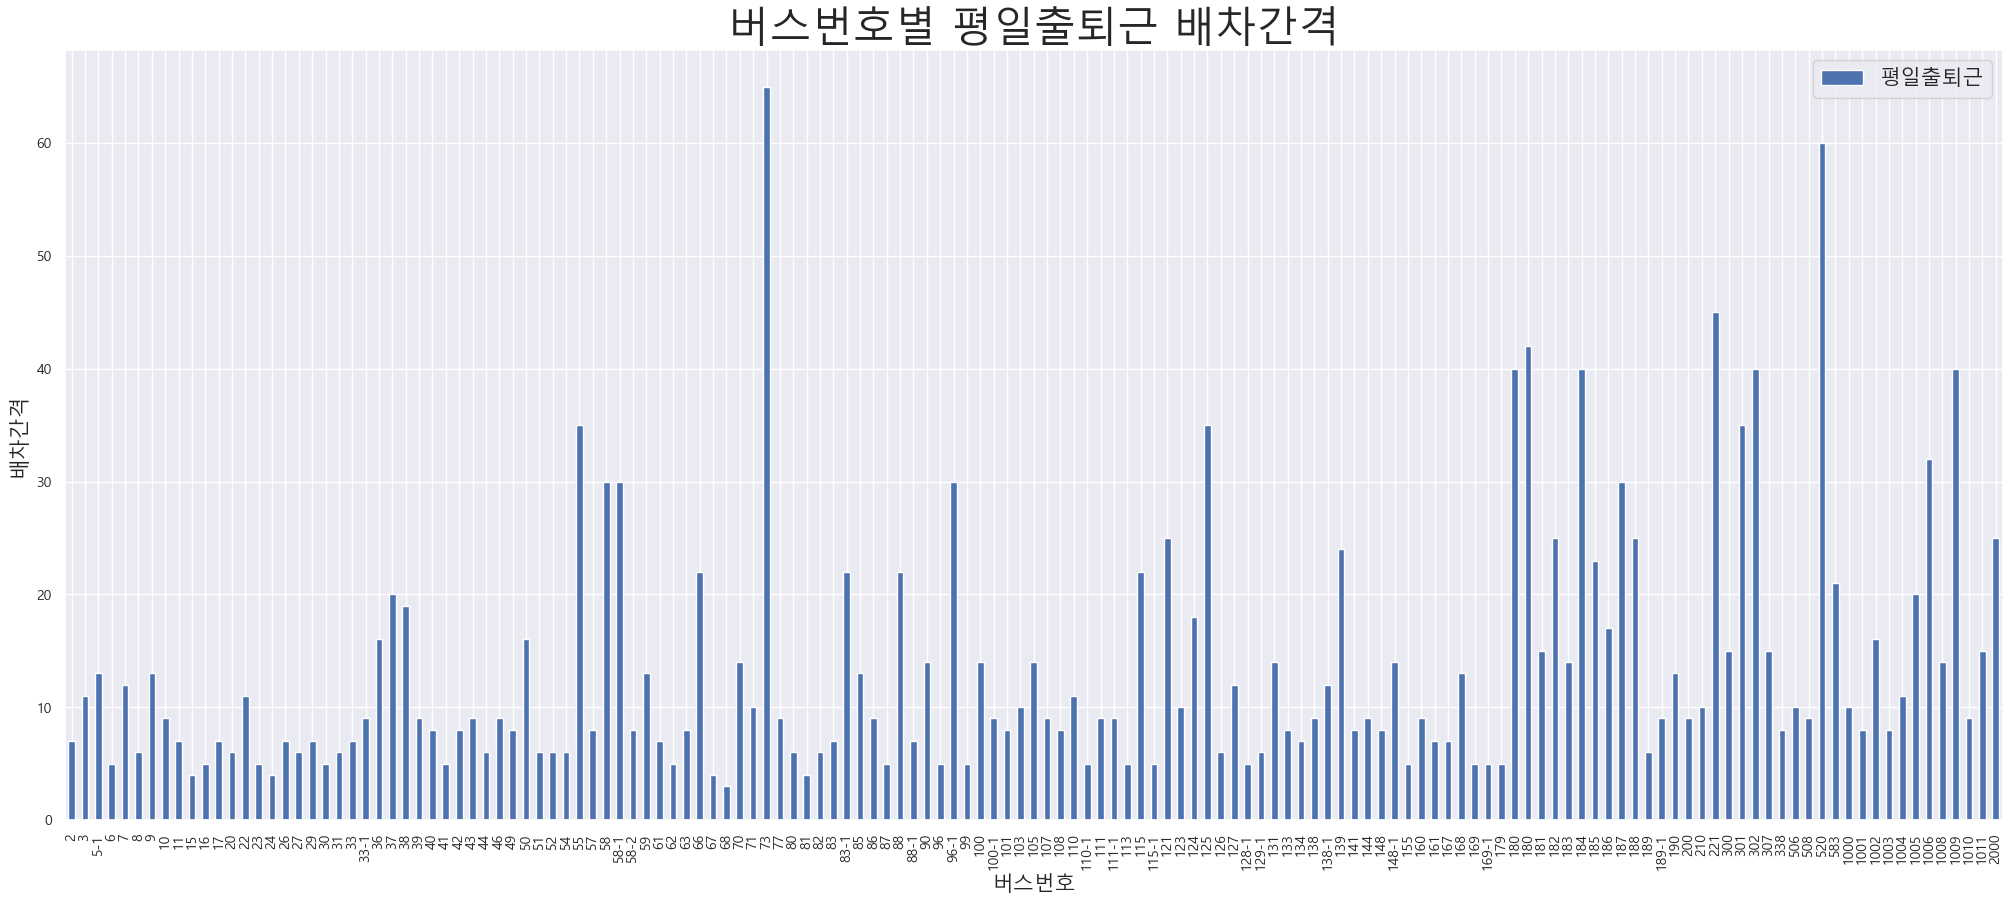

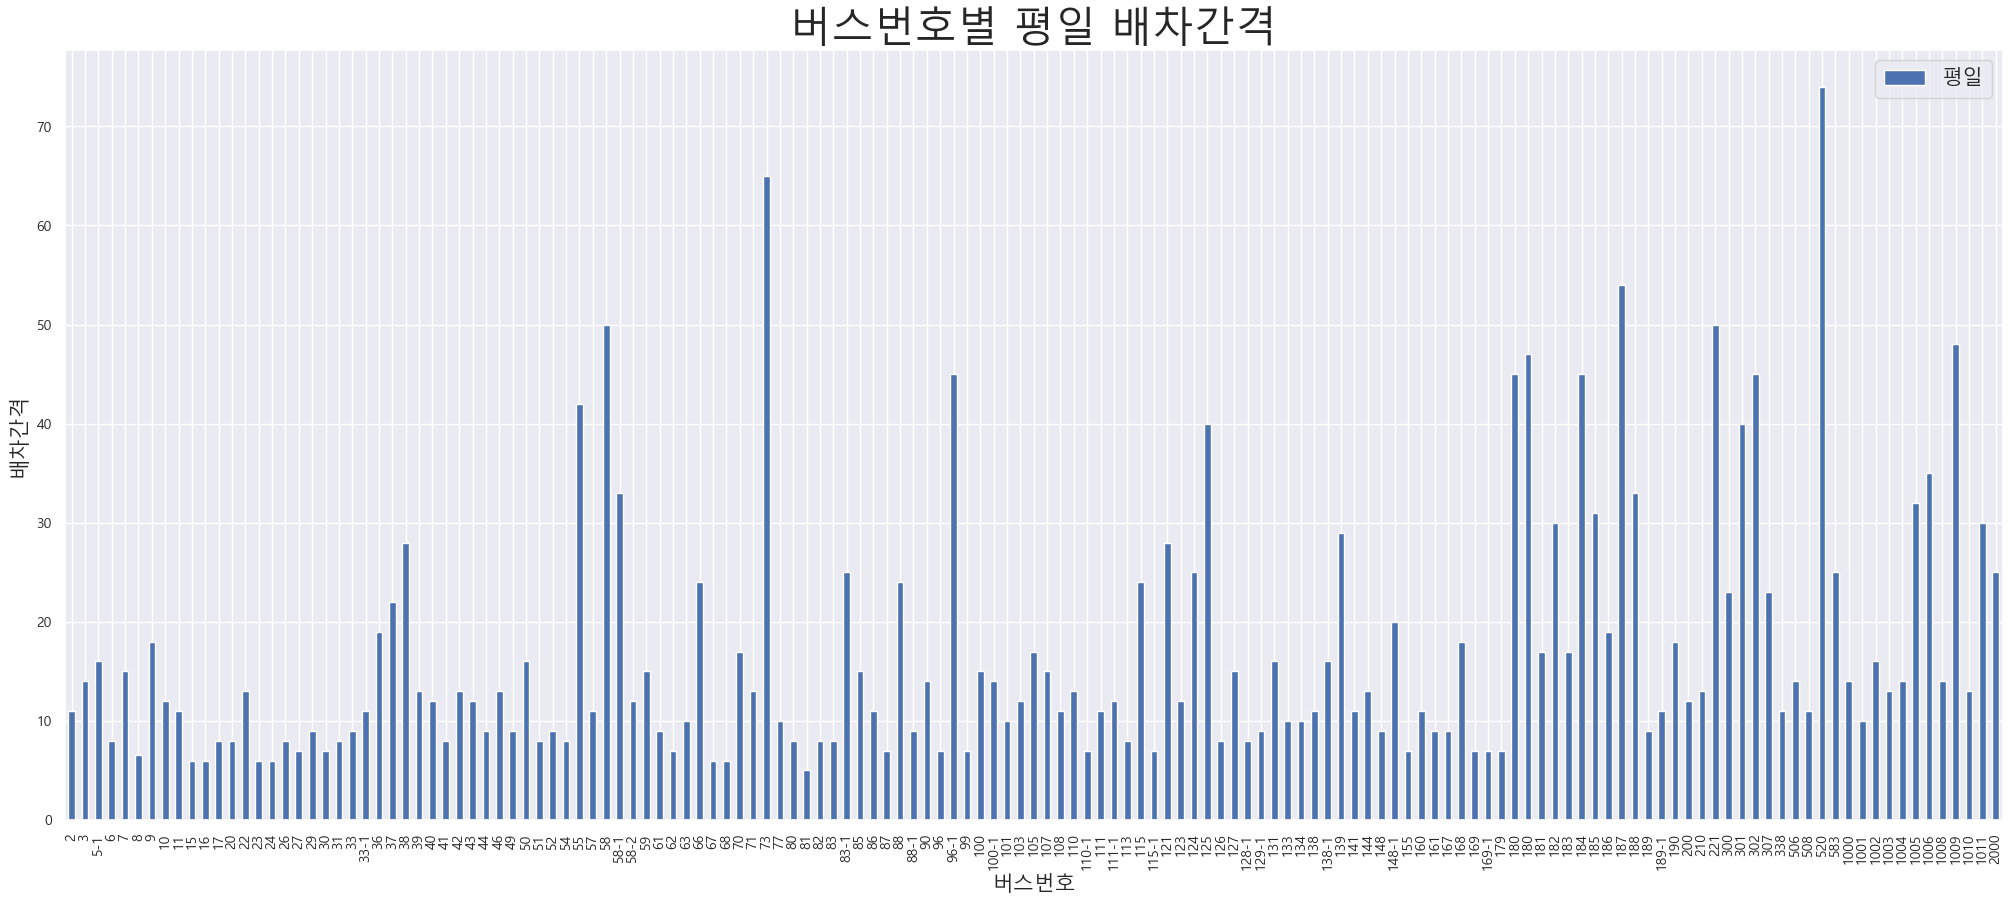

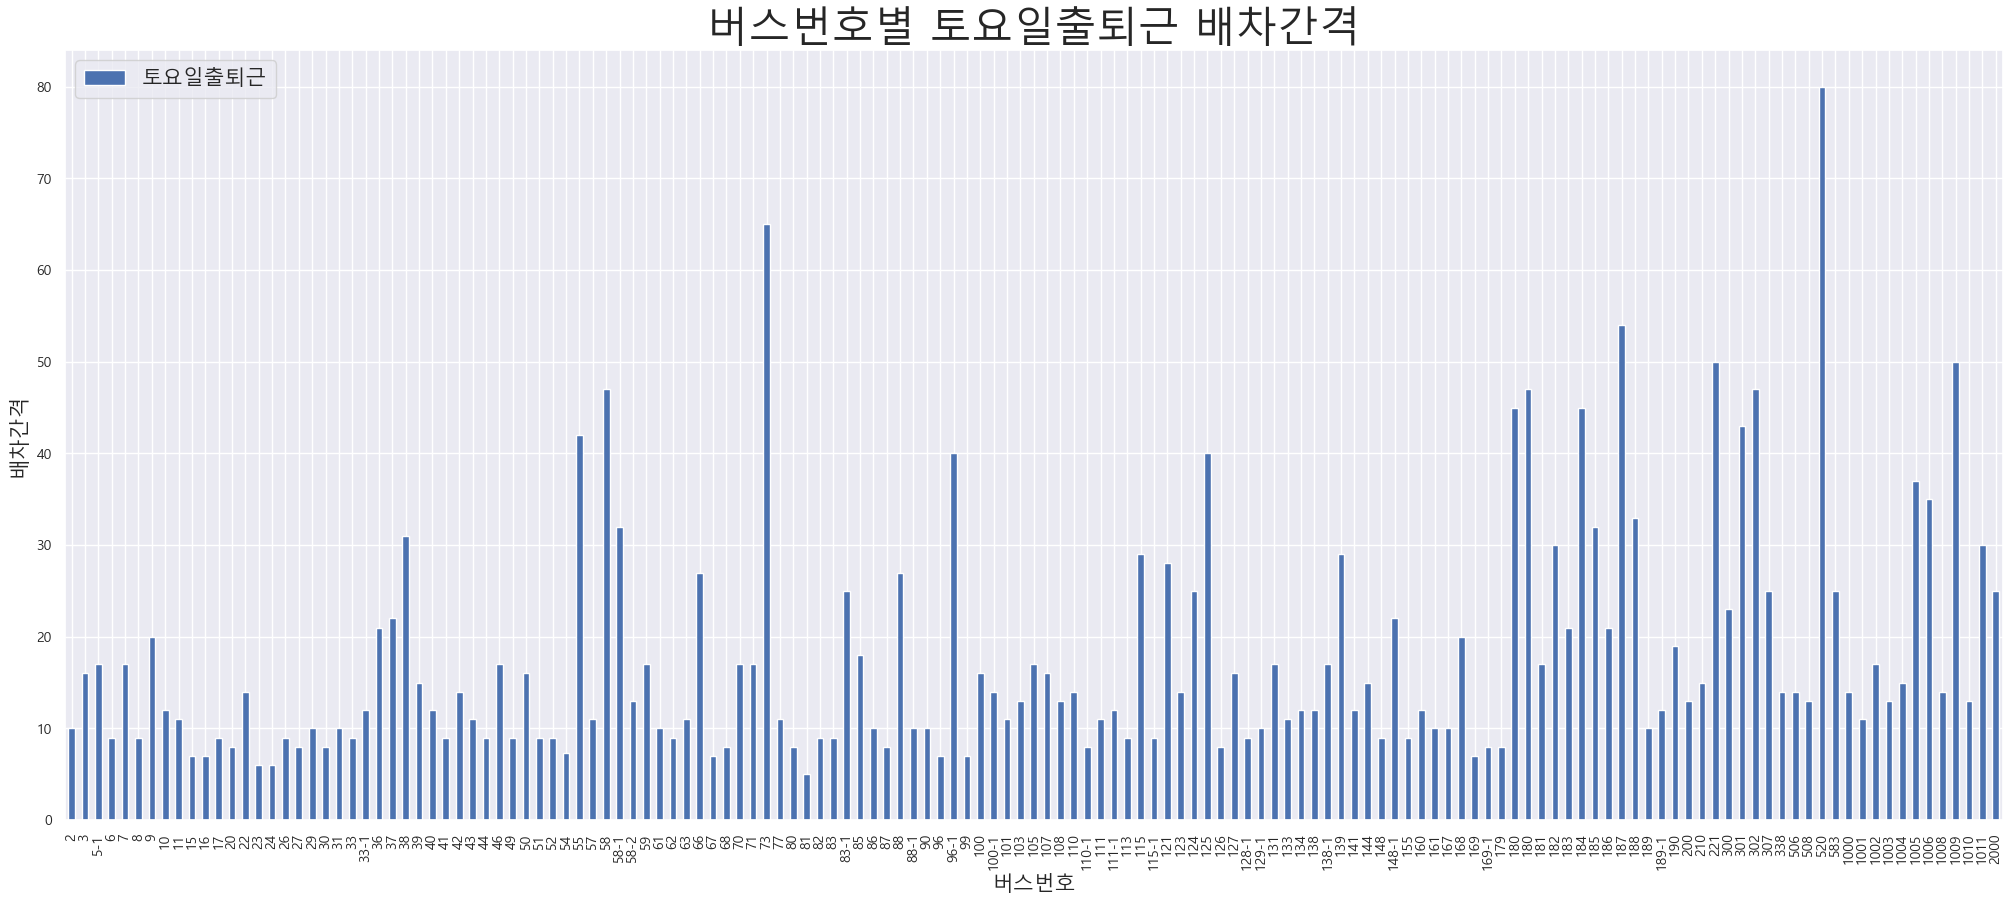

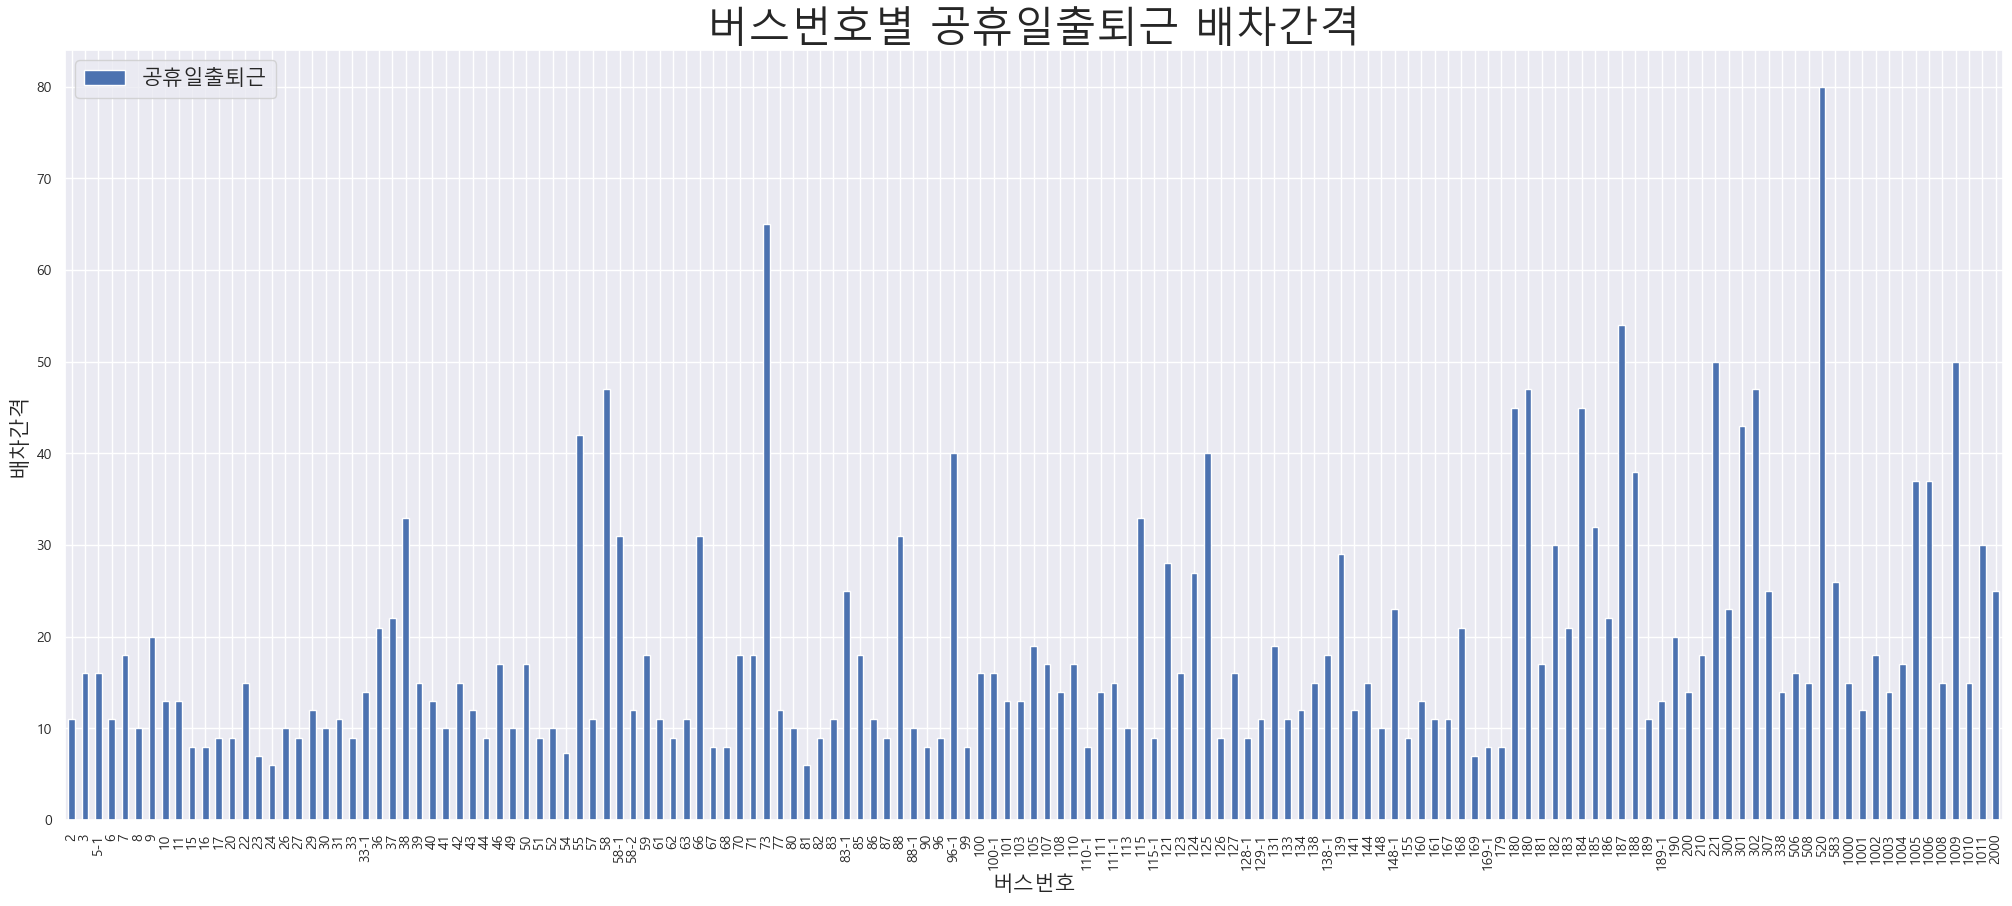

In [14]:
for i in range(0, 4):
    interval = bustime[[bustime.columns[i]]]
    plt.rcParams['figure.figsize'] = (25,10)
    interval.plot(kind='bar')
    plt.title(f'버스번호별 {bustime.columns[i]} 배차간격', fontsize=30)
    plt.xlabel('버스번호', fontsize=15)
    plt.ylabel('배차간격', fontsize=15)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend([f'{bustime.columns[i]}'], fontsize=15)
    plt.show()

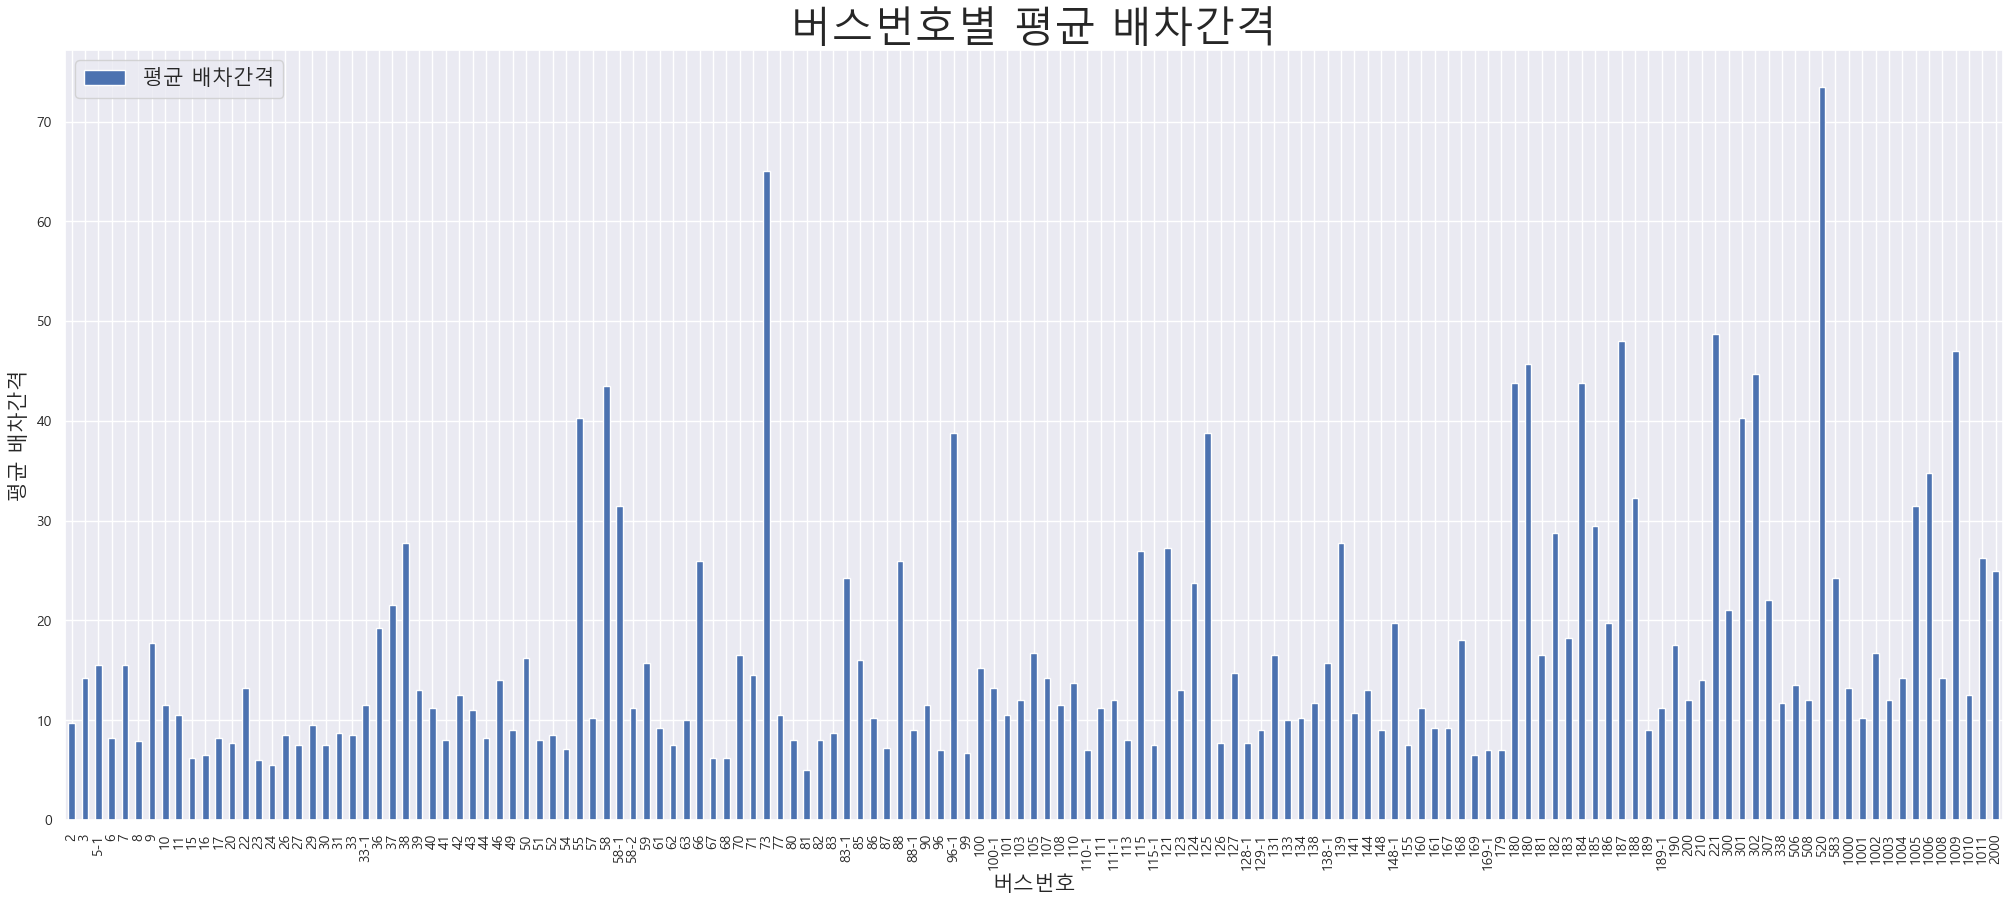

In [15]:
interval = bustime[['평균 배차간격']]
plt.rcParams['figure.figsize'] = (25,10)
interval.plot(kind='bar')
plt.title(f'버스번호별 평균 배차간격', fontsize=30)
plt.xlabel('버스번호', fontsize=15)
plt.ylabel('평균 배차간격', fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(['평균 배차간격'], fontsize=15)
plt.show()

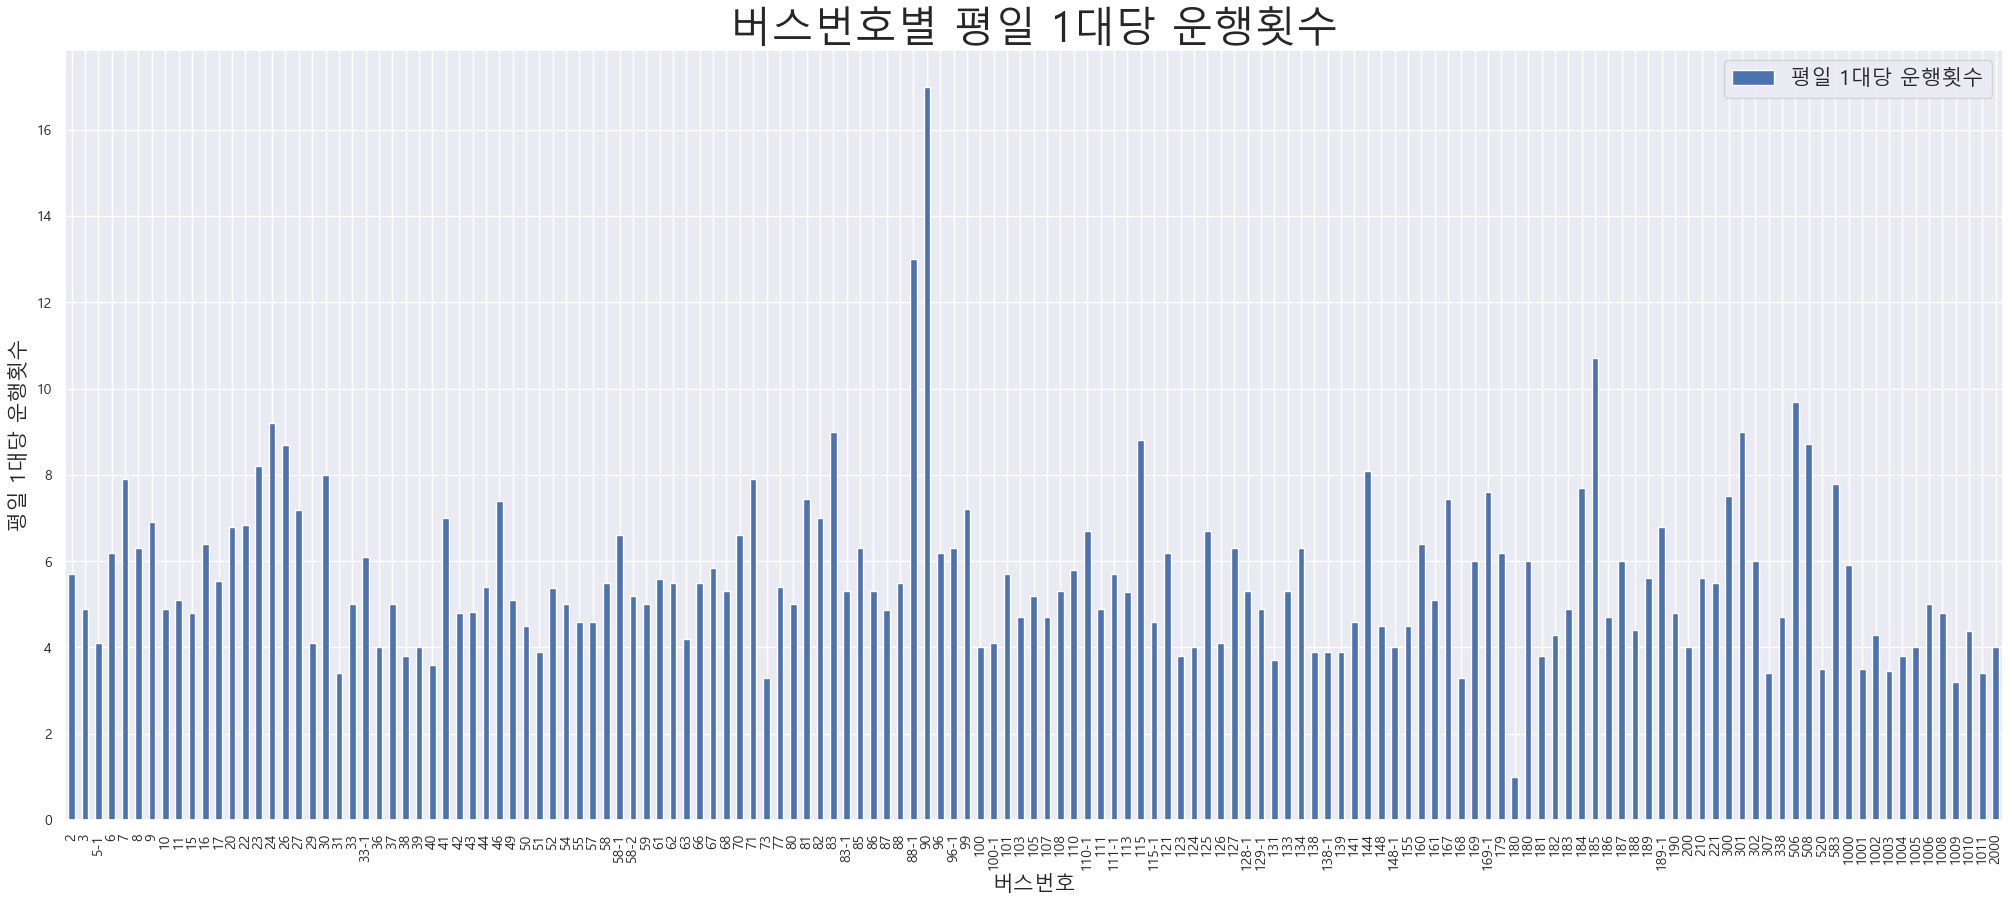

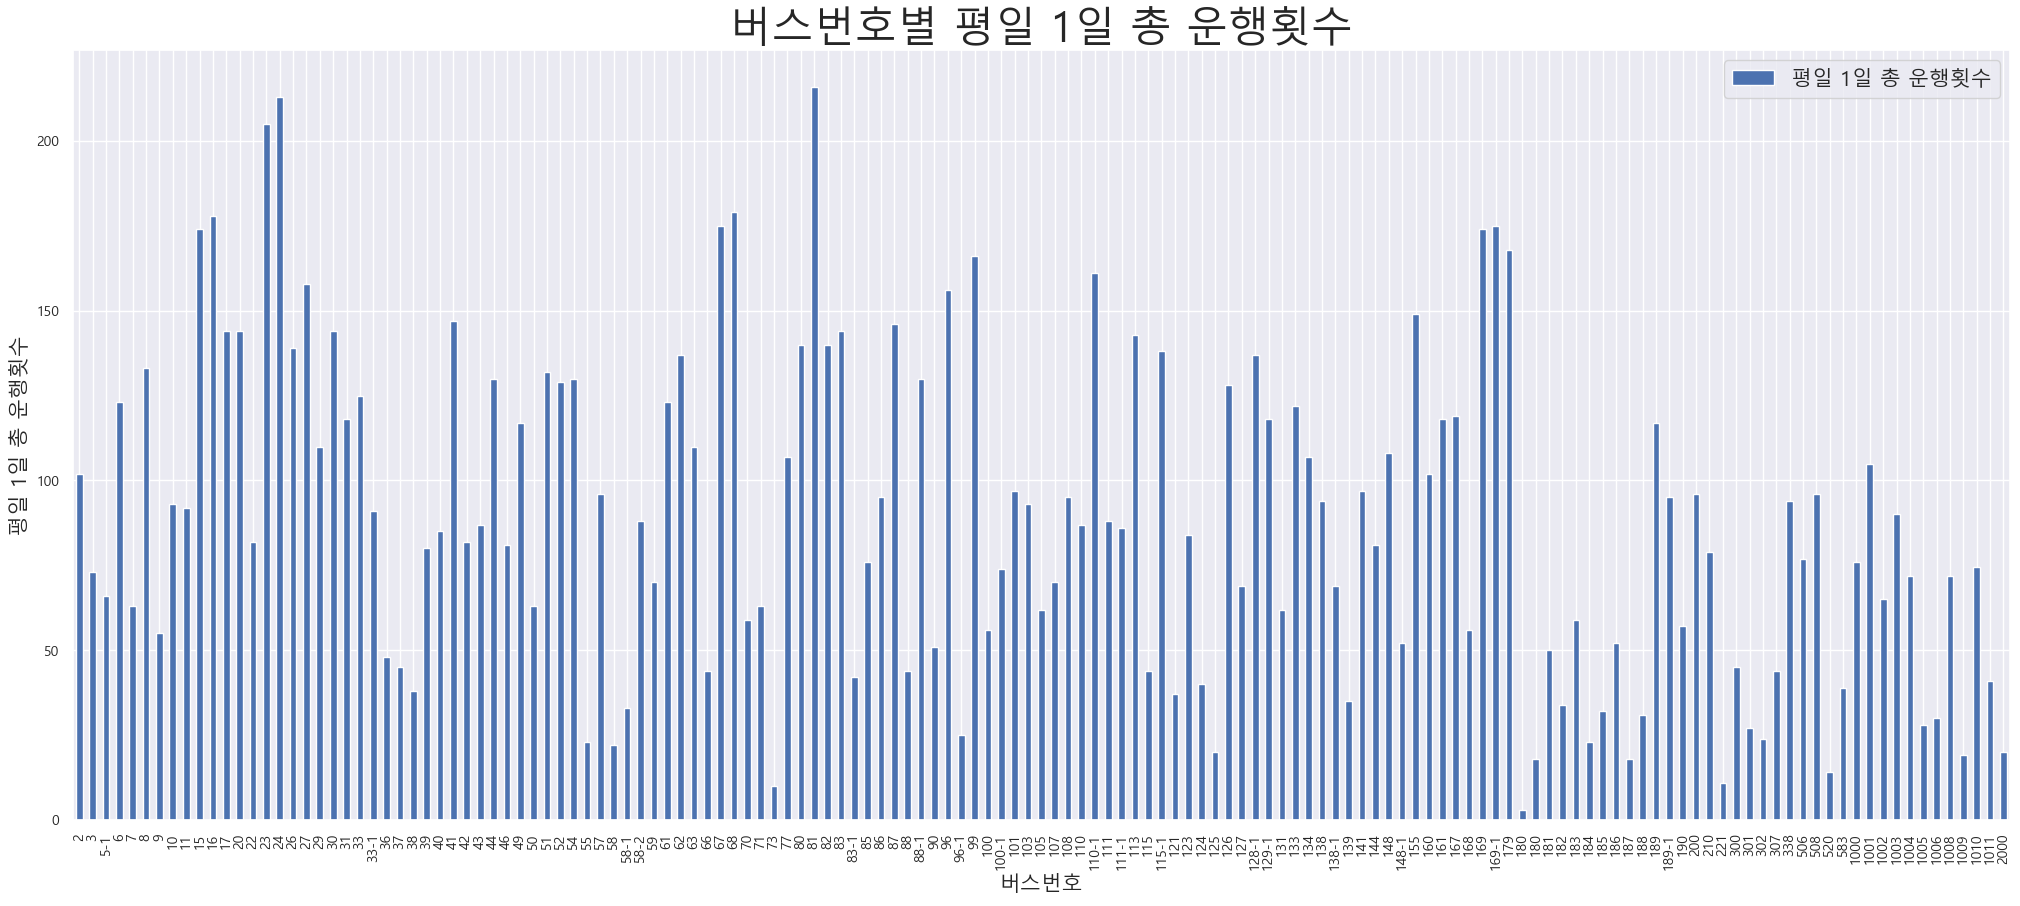

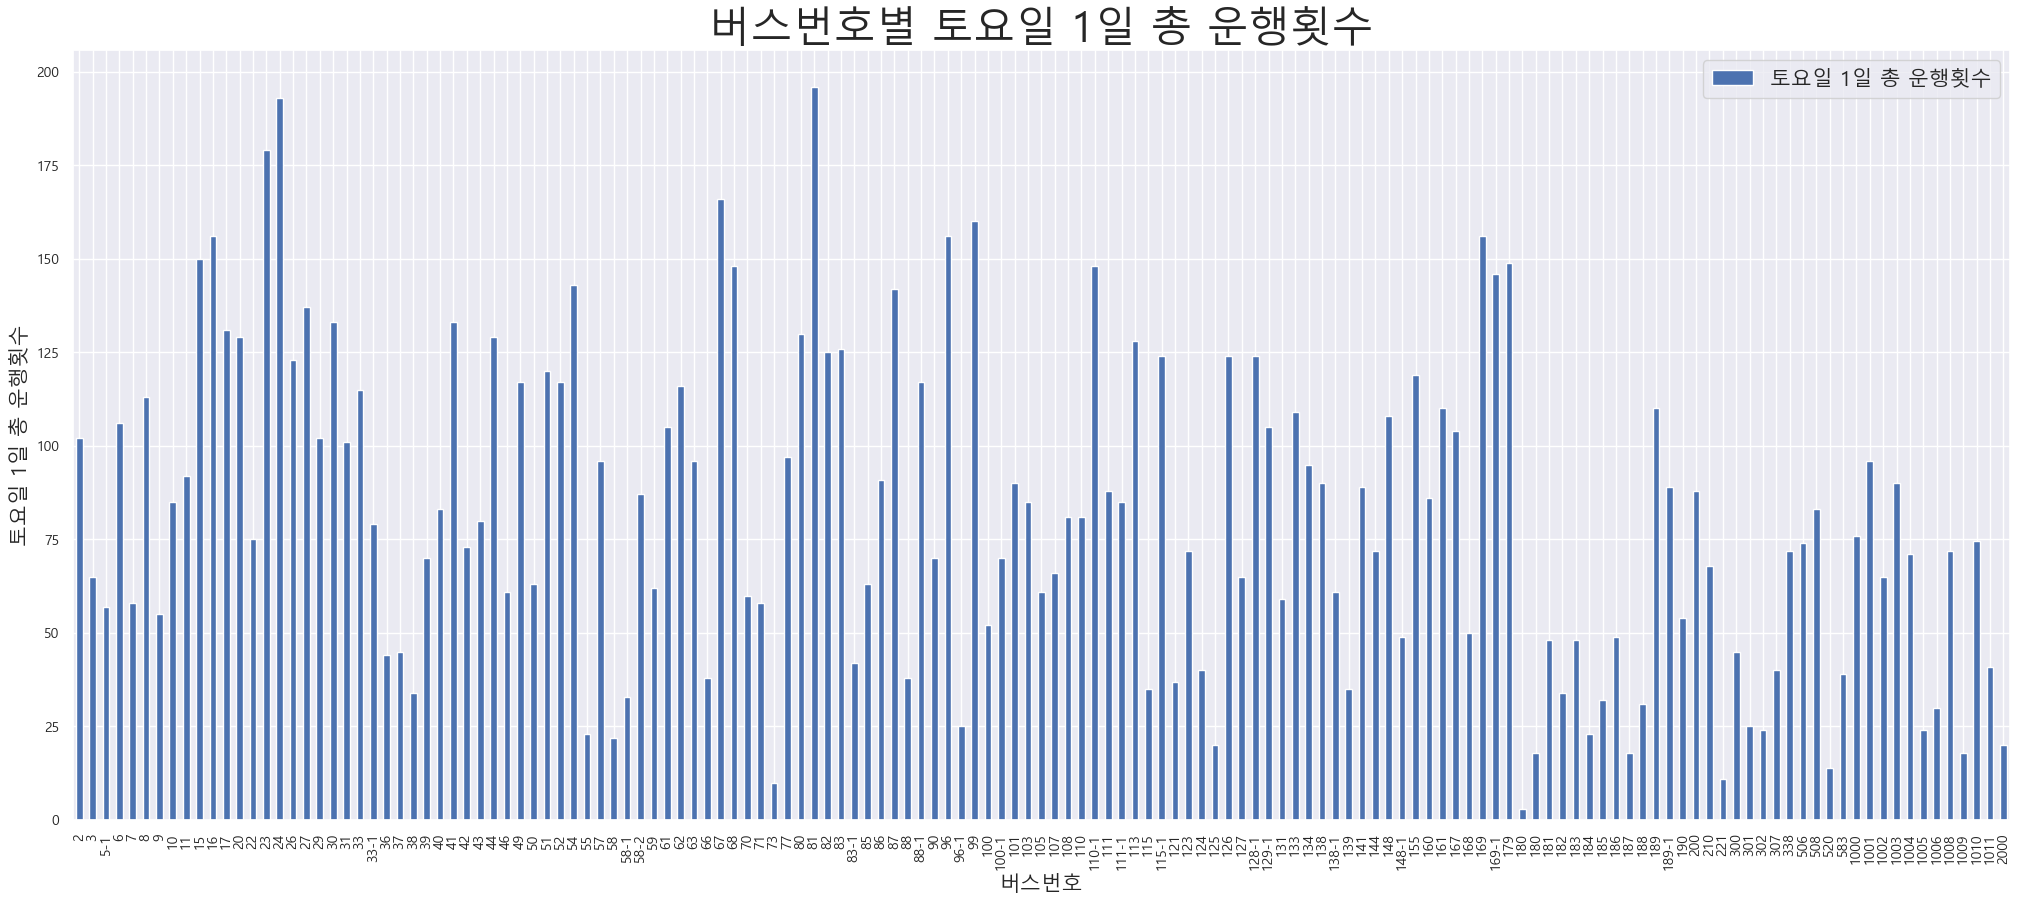

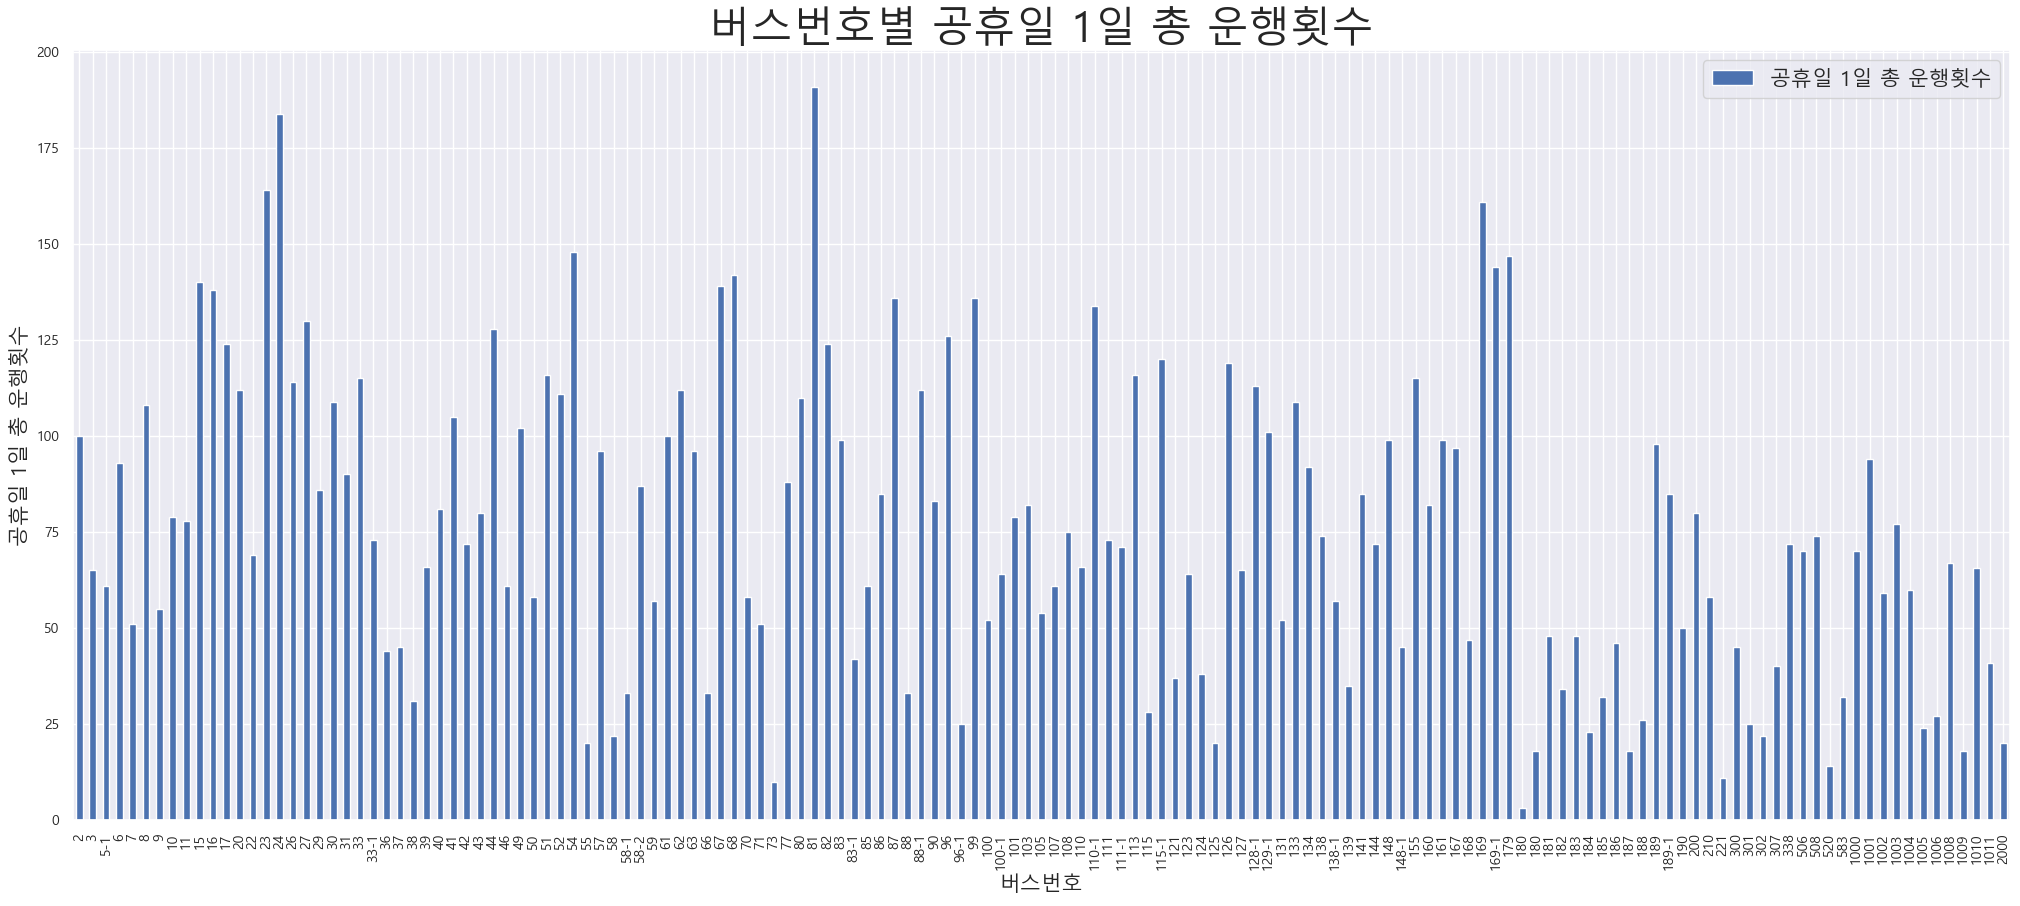

In [16]:
for i in range(4, 8):
    cnt = bustime[[bustime.columns[i]]]
    plt.rcParams['figure.figsize'] = (25,10)
    cnt.plot(kind='bar')
    plt.title(f'버스번호별 {bustime.columns[i]}', fontsize=30)
    plt.xlabel('버스번호', fontsize=15)
    plt.ylabel(f'{bustime.columns[i]}', fontsize=15)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend([f'{bustime.columns[i]}'], fontsize=15)
    plt.show()

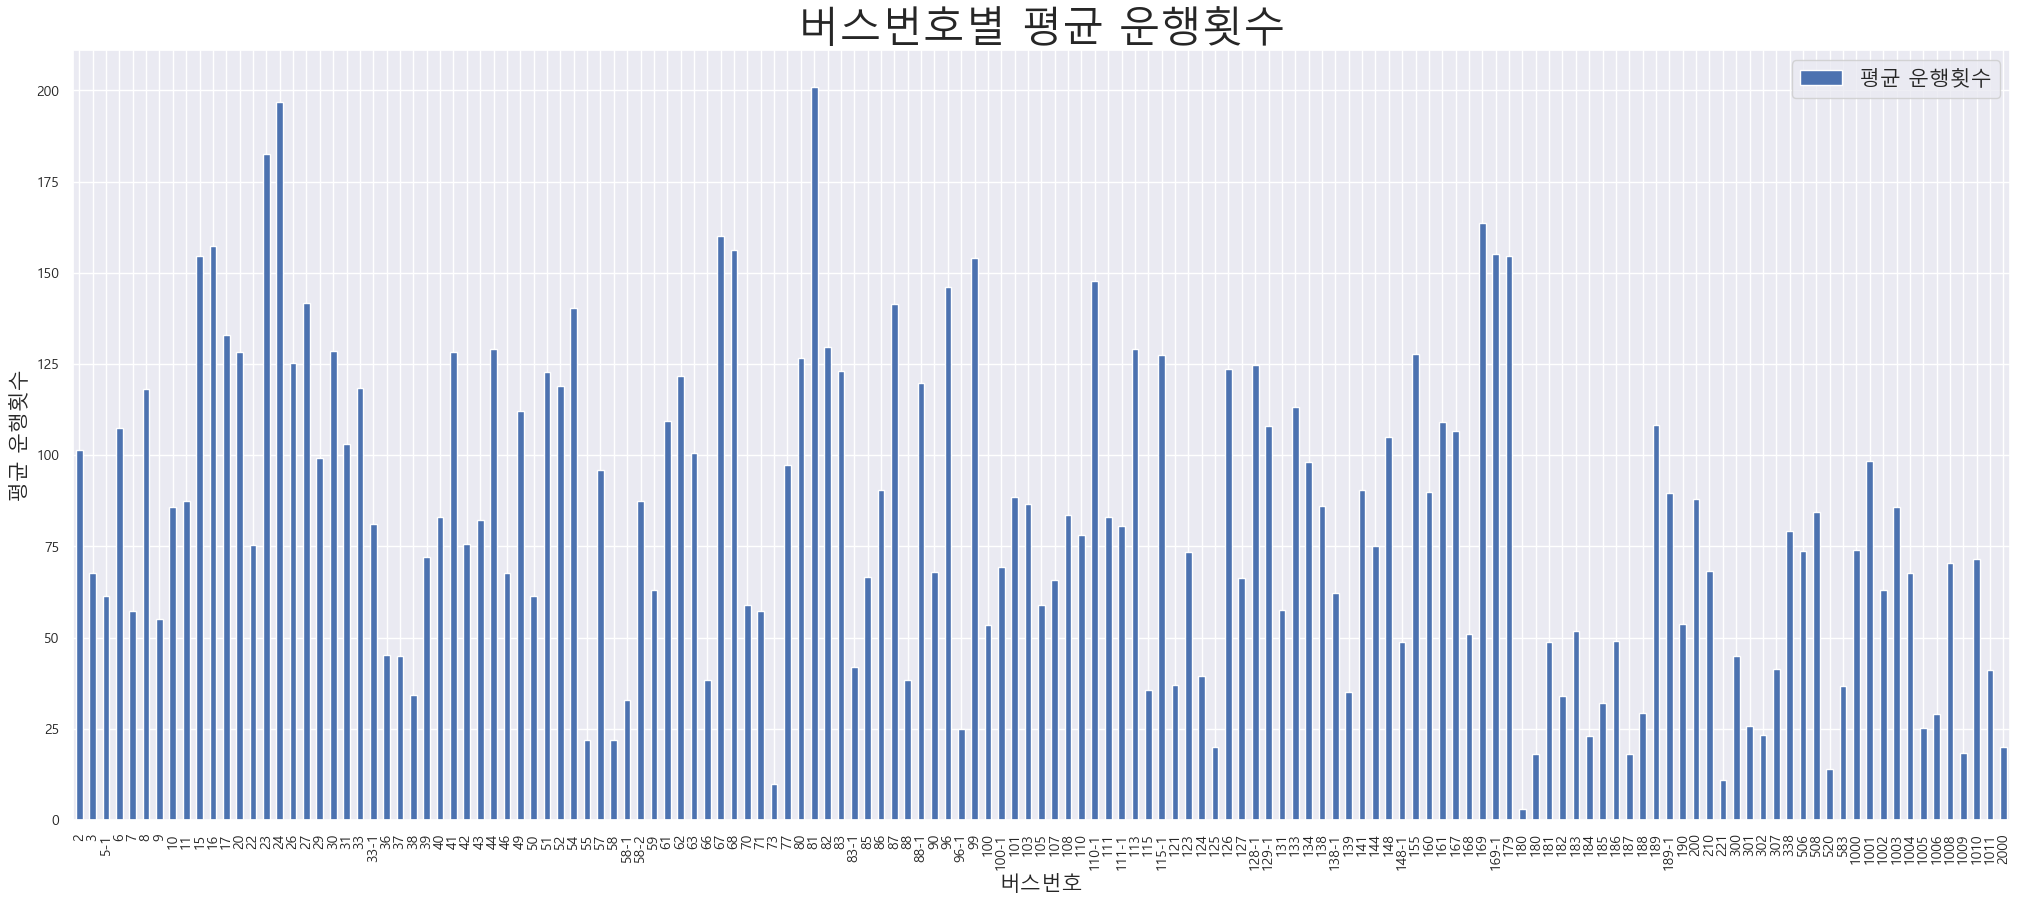

In [17]:
cnt = bustime[['평균 운행횟수']]
plt.rcParams['figure.figsize'] = (25,10)
cnt.plot(kind='bar')
plt.title(f'버스번호별 평균 운행횟수', fontsize=30)
plt.xlabel('버스번호', fontsize=15)
plt.ylabel('평균 운행횟수', fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(['평균 운행횟수'], fontsize=15)
plt.show()

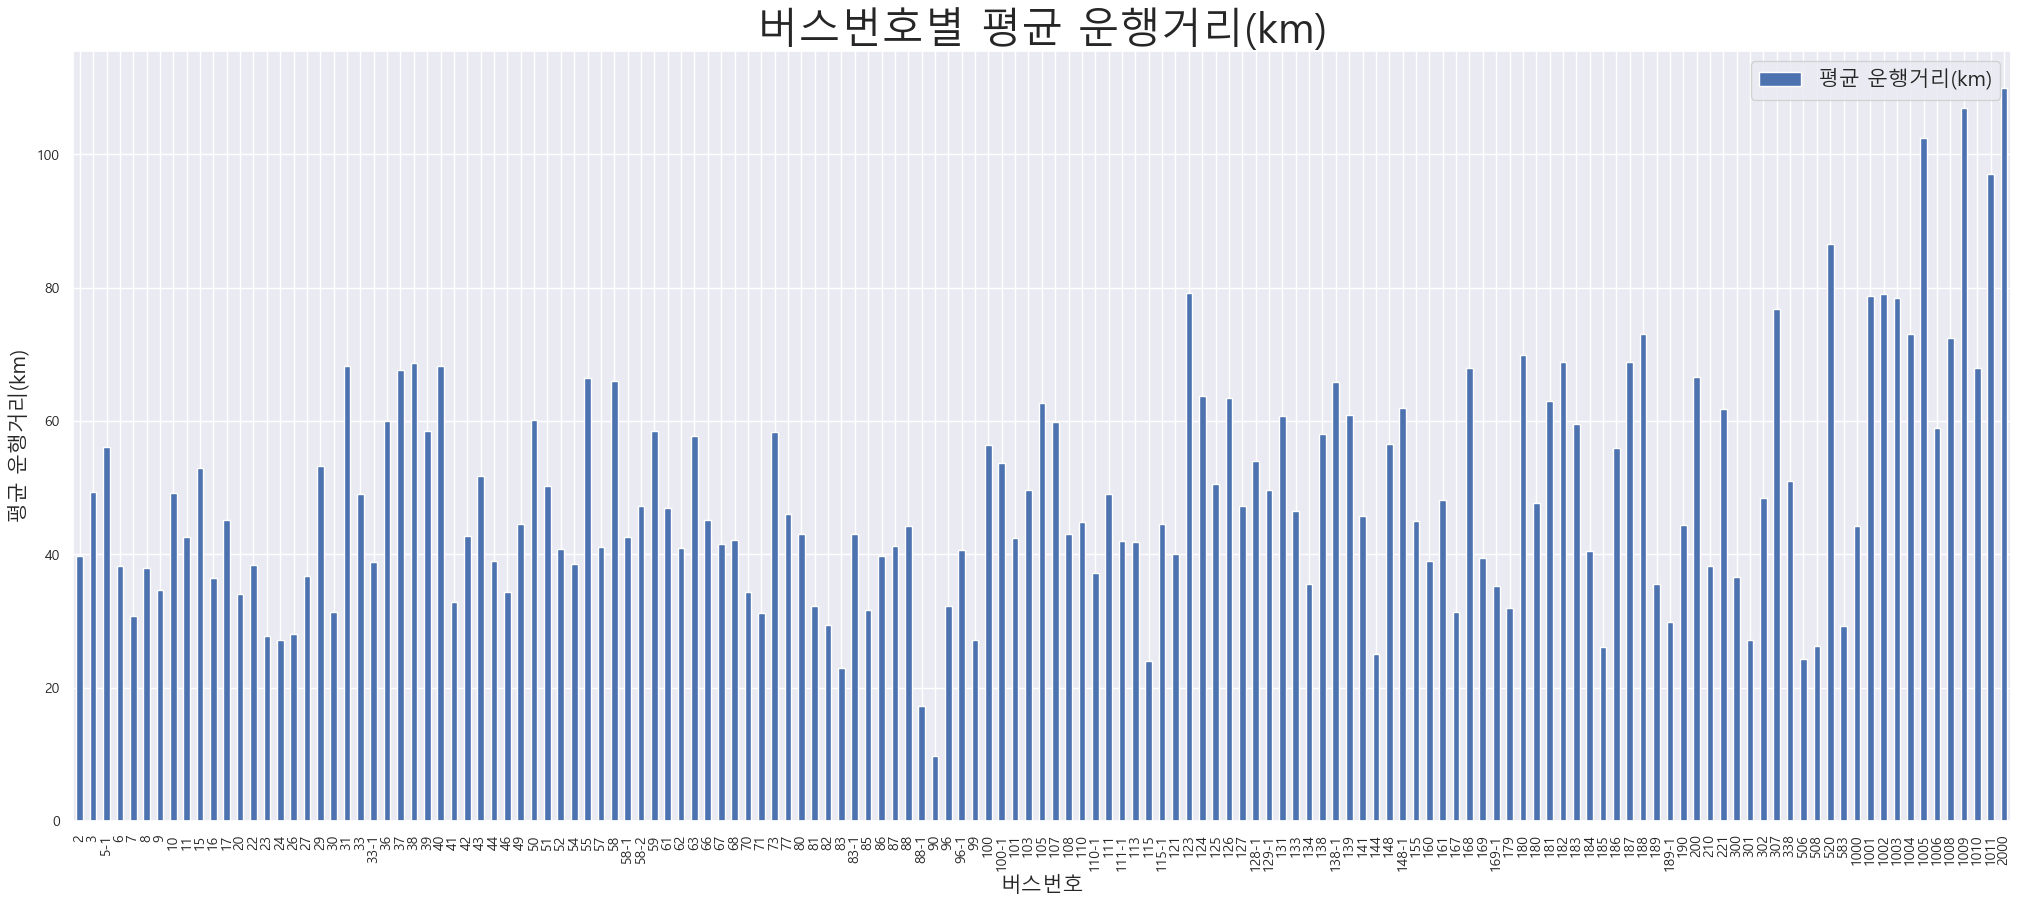

In [18]:
cnt = bustime[['운행거리(km)']]
plt.rcParams['figure.figsize'] = (25,10)
cnt.plot(kind='bar')
plt.title(f'버스번호별 평균 운행거리(km)', fontsize=30)
plt.xlabel('버스번호', fontsize=15)
plt.ylabel('평균 운행거리(km)', fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(['평균 운행거리(km)'], fontsize=15)
plt.show()

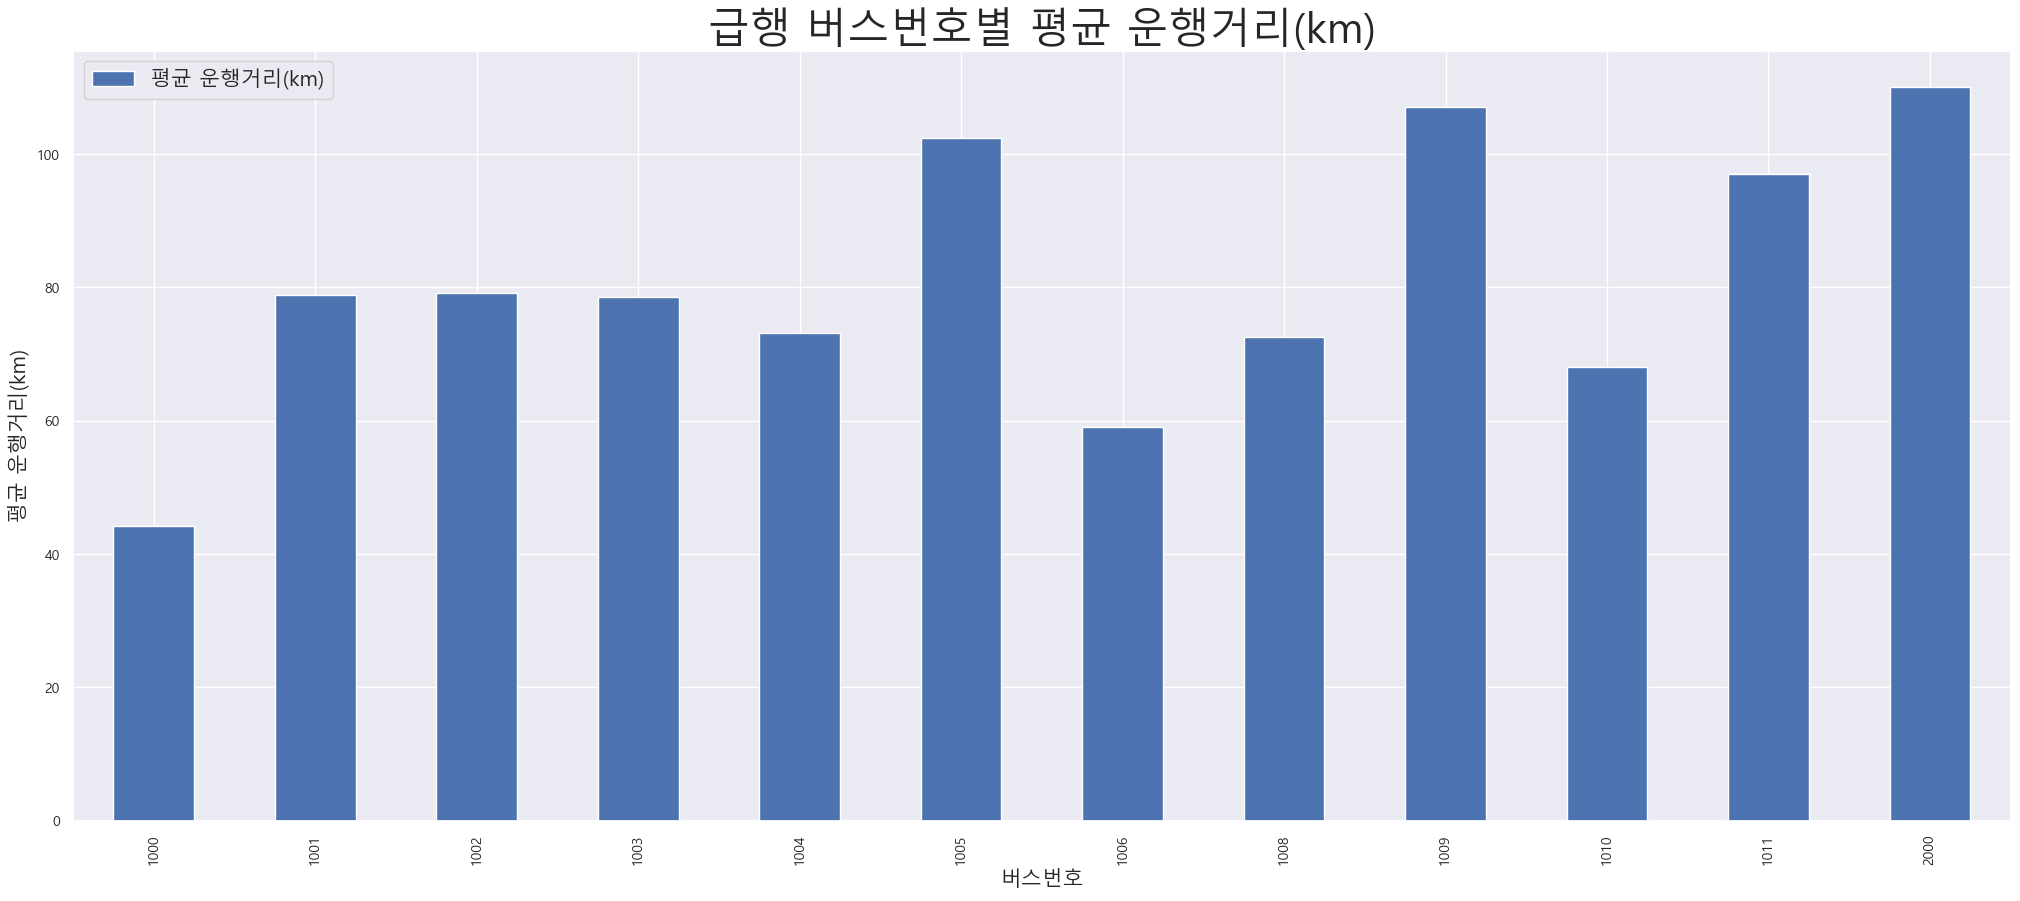

In [27]:
cnt = bustime_ep[['운행거리(km)']]
plt.rcParams['figure.figsize'] = (25,10)
cnt.plot(kind='bar')
plt.title(f'급행 버스번호별 평균 운행거리(km)', fontsize=30)
plt.xlabel('버스번호', fontsize=15)
plt.ylabel('평균 운행거리(km)', fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(['평균 운행거리(km)'], fontsize=15)
plt.show()

In [28]:
bustime_ep['운행거리(km)'].describe()

count     12.000000
mean      80.800000
std       19.970615
min       44.200000
25%       71.375000
50%       78.650000
75%       98.350000
max      110.000000
Name: 운행거리(km), dtype: float64

In [29]:
bustime['평균 배차간격'].describe()

count     145.0
unique     78.0
top         9.0
freq        5.0
Name: 평균 배차간격, dtype: float64

In [22]:
bustime['평일 1대당 운행횟수'].describe()

count     145.0
unique     73.0
top         4.0
freq        8.0
Name: 평일 1대당 운행횟수, dtype: float64

In [23]:
bustime['평균 운행횟수'].describe()

count     145.000000
unique    126.000000
top        67.666667
freq        3.000000
Name: 평균 운행횟수, dtype: float64

In [24]:
bustime['운행거리(km)'].describe()

count    145.000000
mean      49.002759
std       17.393769
min        9.800000
25%       38.000000
50%       45.100000
75%       59.800000
max      110.000000
Name: 운행거리(km), dtype: float64

In [25]:
bustime.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145 entries, 2 to 2000
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   평일출퇴근          145 non-null    object 
 1   평일             145 non-null    object 
 2   토요일출퇴근         145 non-null    object 
 3   공휴일출퇴근         145 non-null    object 
 4   평일 1대당 운행횟수    145 non-null    object 
 5   평일 1일 총 운행횟수   145 non-null    object 
 6   토요일 1일 총 운행횟수  145 non-null    object 
 7   공휴일 1일 총 운행횟수  145 non-null    object 
 8   운행거리(km)       145 non-null    float64
 9   평균 배차간격        145 non-null    object 
 10  평균 운행횟수        145 non-null    object 
dtypes: float64(1), object(10)
memory usage: 13.6+ KB
